DEBUG: Checking if DataMergeNY() is complete
INFO: Informed scheduler that task   DataMergeNY__99914b932b   has status   PENDING
DEBUG: Checking if DataMergeTampa() is complete
INFO: Informed scheduler that task   DataMergeTampa__99914b932b   has status   PENDING
DEBUG: Checking if DataMergeWSJ() is complete
INFO: Informed scheduler that task   DataMergeWSJ__99914b932b   has status   PENDING
DEBUG: Checking if FakeNewsDataMerge() is complete
INFO: Informed scheduler that task   FakeNewsDataMerge__99914b932b   has status   PENDING
DEBUG: Checking if MergeAllDataSingleFile() is complete
DEBUG: Checking if DataMergeNY() is complete
DEBUG: Checking if DataMergeTampa() is complete
DEBUG: Checking if DataMergeWSJ() is complete
DEBUG: Checking if FakeNewsDataMerge() is complete
INFO: Informed scheduler that task   MergeAllDataSingleFile__99914b932b   has status   PENDING
INFO: Informed scheduler that task   FakeNewsDataMerge__99914b932b   has status   PENDING
INFO: Informed scheduler that tas

TfidfVectorizer(analyzer='word', binary=False, decode_error='replace',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function Model.run.<locals>.porter_tokenizer at 0x000002A37AAEDE18>,
        use_idf=True, vocabulary=None)


C:\Users\manee\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SUPPORT VECTOR MACHINE USING COUNT VECTORIZER


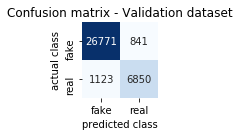

Precision =  0.9695422280168043
Recall =  0.9597404459740446
F1 Score =  0.9646164378625735
F1 % =  96.46164378625734
Error Rate =  0.055191794295349164
Accuracy =  0.9448082057046508
ROC Curve:


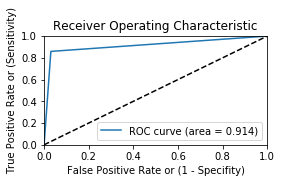

ROC-AUC 0.9143459290090293
SUPPORT VECTOR MACHINE USING TFIDF VECTORIZER


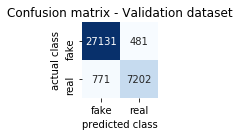

Precision =  0.9825800376647834
Recall =  0.9723675722170454
F1 Score =  0.9774471304535793
F1 % =  97.74471304535794
Error Rate =  0.03518336377687228
Accuracy =  0.9648166362231277
ROC Curve:


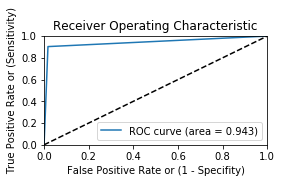

ROC-AUC 0.9429393352753868


C:\Users\manee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5-FOLD SUPPORT VECTOR MACHINE USING COUNT VECTORIZER


C:\Users\manee\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


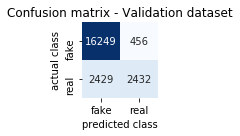

Precision =  0.9727027835977252
Recall =  0.8699539565263947
F1 Score =  0.9184636689935844
F1 % =  91.84636689935844
Error Rate =  0.13377538718352963
Accuracy =  0.8662246128164703


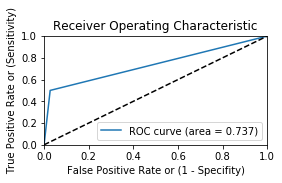

ROC-AUC 0.7365056810397596


C:\Users\manee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5-FOLD SUPPORT VECTOR MACHINE USING TFIDF VECTORIZER


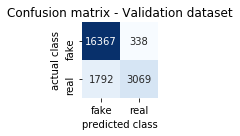

Precision =  0.9797665369649805
Recall =  0.901316151770472
F1 Score =  0.9389054612207435
F1 % =  93.89054612207434
Error Rate =  0.09876657701938236
Accuracy =  0.9012334229806176


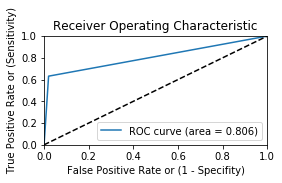

ROC-AUC 0.8055590553576188


INFO: [pid 1416] Worker Worker(salt=155152227, workers=1, host=DESKTOP-61TRKON, username=manee, pid=1416) done      Model()
DEBUG: 1 running tasks, waiting for next task to finish
INFO: Informed scheduler that task   Model__99914b932b   has status   DONE
DEBUG: Asking scheduler for work...
DEBUG: Done
DEBUG: There are no more tasks to run at this time
INFO: Worker Worker(salt=155152227, workers=1, host=DESKTOP-61TRKON, username=manee, pid=1416) was stopped. Shutting down Keep-Alive thread
INFO: 
===== Luigi Execution Summary =====

Scheduled 7 tasks of which:
* 7 ran successfully:
    - 1 DataCleaning()
    - 1 DataMergeNY()
    - 1 DataMergeTampa()
    - 1 DataMergeWSJ()
    - 1 FakeNewsDataMerge()
    ...

This progress looks :) because there were no failed tasks or missing dependencies

===== Luigi Execution Summary =====



In [4]:
import luigi
import pandas as pd
import os
import numpy as np
import re
import chardet
import pickle
import sklearn
import seaborn as sns
import itertools
import nltk
import string
from unidecode import unidecode
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
import matplotlib as mp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn import metrics
from pandas_ml import ConfusionMatrix
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold


class DataMergeNY(luigi.Task):

    def output(self):
        return luigi.LocalTarget("Merged_NY.csv")

    def run(self):
        df1 = pd.read_csv(os.getcwd()+'/Data_NY.csv')
        df2 = pd.read_csv(os.getcwd()+'/Data_NY1.csv')
        df3 = pd.read_csv(os.getcwd()+'/Data_NY2.csv')
        df4 = pd.read_csv(os.getcwd()+'/Data_NY3.csv')
        df5 = pd.read_csv(os.getcwd()+'/Data_NY4.csv')
        df6 = pd.read_csv(os.getcwd()+'/Data_NY5.csv')
        df7 = pd.read_csv(os.getcwd()+'/Data_NY6.csv')
        
        df_final_NY = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index=False, sort = False)
        
        df_final_NY.drop(df_final_NY.columns[0], axis=1, inplace = True)
        
        df_final_NY['Label'] = "Real"
        
        df_final_NY.to_csv("Merged_NY.csv")


class DataMergeTampa(luigi.Task):
    
    def output(self):
        return luigi.LocalTarget("Merged_TB.csv")
    
    def run(self):
        df1 = pd.read_csv(os.getcwd()+'/Data_Tampa.csv')
        df2 = pd.read_csv(os.getcwd()+'/Data_Tampa1.csv')
        df3 = pd.read_csv(os.getcwd()+'/Data_Tampa2.csv')
        df4 = pd.read_csv(os.getcwd()+'/Data_Tampa3.csv')
        df5 = pd.read_csv(os.getcwd()+'/Data_Tampa4.csv')
        df6 = pd.read_csv(os.getcwd()+'/Data_Tampa5.csv')
        df7 = pd.read_csv(os.getcwd()+'/Data_Tampa6.csv')
        
        df_final_TB = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index=False, sort = False)
        
        df_final_TB.drop(df_final_TB.columns[10], axis=1, inplace = True)
        
        df_final_TB['Label'] = "Real"
        
        df_final_TB.to_csv("Merged_TB.csv")

        
class DataMergeWSJ(luigi.Task):
    
    def output(self):
        return luigi.LocalTarget("Merged_WSJ.csv")
    
    def run(self):
        df1 = pd.read_csv(os.getcwd()+'/Data_WSJ.csv')
        df2 = pd.read_csv(os.getcwd()+'/Data_WSJ1.csv')
        
        df_final_WSJ = pd.concat([df1, df2], ignore_index=False, sort = False)
        
        df_final_WSJ.drop(df_final_WSJ.columns[0], axis=1, inplace = True)
        
        df_final_WSJ['Label'] = "Real"
        
        df_final_WSJ.to_csv("Merged_WSJ.csv")
        
class FakeNewsDataMerge(luigi.Task):
    
    def output(self):
        return luigi.LocalTarget("FakeNews_clean.csv")
    
    def run(self):
        df1 = pd.read_csv(os.getcwd()+'/fakeNews.csv')
        
        dffk = df1[df1.Year == 2019]
        dffk.drop(dffk.columns[0], axis=1, inplace = True)
        dffk['Label']= "Fake"
        
        dffk.to_csv("FakeNews_clean.csv")
        
class MergeAllDataSingleFile(luigi.Task):
    
    def output(self):
        return luigi.LocalTarget("Data_fakenreal.csv")
    
    def requires(self):
        yield DataMergeNY()
        yield DataMergeTampa()
        yield DataMergeWSJ()
        yield FakeNewsDataMerge()
         
    def run(self):
        df_NY = pd.read_csv("Merged_NY.csv")
        df_TB = pd.read_csv("Merged_TB.csv")
        df_WSJ = pd.read_csv("Merged_WSJ.csv")
        df_fake = pd.read_csv("FakeNews_clean.csv")
        
        df_final = pd.concat([df_NY,df_TB,df_WSJ,df_fake], sort = False)
        
        df_final.to_csv("Data_fakenreal.csv", index= False)
    
    
class DataCleaning(luigi.Task):
    
    def requires(self):
        yield MergeAllDataSingleFile()
    
    def run(self):
        #To identify encoding type
        with open(os.getcwd() + "/Data_fakenreal.csv","rb") as rawdata:
            result = chardet.detect(rawdata.read(10000))

        # Read the data in the CSV file using pandas
        df = pd.read_csv("Data_fakenreal.csv").drop(['Unnamed: 0'],axis=1)

        df.Title.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
        df.Content.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

        # # Checking Null Columns
        # null_columns = df.columns[df.isnull().any()]
        # print(null_columns)

        # print(df[df.isnull().any(axis=1)][null_columns].head())

        #***********************************Missing Values *************************************

        df.Author.replace({r'[^a-zA-Z,]+':''}, regex=True, inplace=True)
        df.Author.replace({r'a ab abc abcd abcde abcdef ahf':''}, inplace=True)
        df.Author.replace({r'a f d':''}, inplace=True)

        df.Title.replace({r'[^a-zA-Z]+':''}, regex=True, inplace=True)

        df = df[df.Published != 'None']

        df.replace('', np.nan, inplace=True)

        #filling null titles with miscellaneous
        df.fillna({'Author':'Journalist','Title':'Miscellaneous' }, inplace=True)

        #removing urls in the content
        df['Content'] = df['Content'].replace(r'http\S', '',regex=True).replace(r'www\S','',regex=True). replace(r'\.com$','', regex=True).replace(r'@\S','', regex=True)

        df.Content.replace({r'[^a-zA-Z]+':' '}, regex=True, inplace=True)


        # # ***********************************drop values*************************************
        
        df.drop_duplicates(inplace = True)

        df['Author'].replace('', np.nan, inplace=True)

        df.dropna(subset=['Author'], inplace=True)

        df["Content_length"]= df["Content"].str.len()

        df = df[df.Content_length >=10]

        df.drop(df.columns[11], axis=1, inplace = True)

        df["Category"]= df["Category"].str.strip()

        #Adding Labels
        publications = ['WSJ','NY Times','TampaBay']
        
        def f(row):
            if row['Publication'].strip() in publications :
                return "Real"
            else:
                return "Fake"

        df['Label'] = df.apply(f, axis=1)

        del df['ID']

        df = df[df.Title != 'Fake']

        df.insert(loc=0 , column='ID', value=np.random.randint(1,108000, size=len(df)))
 
        df.to_csv("Cleansed_Data.csv",index=False)
    
    def output(self):
        return luigi.LocalTarget("Cleansed_Data.csv")

class Model(luigi.Task):
    
    def requires(self):
        yield DataCleaning()
            
    def run(self):
        # Functions for Precision, Recall, F1 Score, Error Rate, Accuracy, and ROC
        def evaluation(cm):
            TP = cm[0][0]
            FP = cm[0][1]
            FN = cm[1][0]
            TN = cm[1][1]

            #Calculating precision
            def Precision_Cal(TP,FP):
                return TP/(TP+FP)

            #Calculating recall
            def Recall_Cal(TP,FN):
                return TP/(TP+FN)

            #Calculating F1 score
            def F1_Cal(precision,recall):
                f1 = 2*((precision * recall)/(precision+recall))
                print('F1 Score = ', f1)
                print('F1 % = ', f1*100)

            #Calculating Error Rate
            def Err_Cal(TP,FP,FN,TN):
                return ((FP+FN)/(TP+FP+FN+TN))

            precision = Precision_Cal(TP,FP)
            print('Precision = ', precision)

            recall = Recall_Cal(TP,FN)
            print('Recall = ', recall)

            F1_Cal(precision,recall)

            Err_Rate = Err_Cal(TP,FP,FN,TN)
            print('Error Rate = ', Err_Rate)

            #Accuracy is 1-error rate
            print('Accuracy = ', 1-Err_Rate)

        def rocCurve(y_true, y_pred, roc):
            fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
            # Plot ROC curve
            plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc)
            plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.0])
            plt.xlabel('False Positive Rate or (1 - Specifity)')
            plt.ylabel('True Positive Rate or (Sensitivity)')
            plt.title('Receiver Operating Characteristic')
            plt.legend(loc="lower right")
            plt.show()

        def plotConfusionMatrix(cm):
            np.set_printoptions(suppress=True)
            mp.rc("figure", figsize=(4, 2))

            hm = sns.heatmap(cm, 
                        cbar=False,
                        annot=True, 
                        square=True,
                        fmt='d',
                        yticklabels=['fake','real'],
                        xticklabels=['fake','real'],
                        cmap='Blues'
                        )
            plt.title('Confusion matrix - Validation dataset')
            plt.ylabel('actual class')
            plt.xlabel('predicted class')
            plt.tight_layout()
            plt.savefig('confmat_valid.eps', dpi=300)
            plt.show()
            

        df = pd.read_csv(os.getcwd()+'\Cleansed_Data.csv', encoding = 'utf-8')
        
        #Label Encoding 
        Content = df['Content'].values 
        Labels = df['Label'].values

        le = LabelEncoder()
        le.fit(Labels)
        Labels = le.transform(Labels)
        
        #splitting the content and labels into train and test
        X_train, X_test, y_train, y_test = train_test_split(Content, Labels, test_size=0.33, random_state=53)
        
        #process to remove stopwords
        #to perform stemming on the text
        porter_stemmer = nltk.stem.porter.PorterStemmer()

        #spilts the sentences into words
        def porter_tokenizer(text, stemmer=porter_stemmer):
            lower_txt = text.lower()
            tokens = nltk.wordpunct_tokenize(lower_txt)
            stems = [porter_stemmer.stem(t) for t in tokens]
            no_punct = [s for s in stems if re.match('^[a-zA-Z]+$', s) is not None]
            return no_punct

        stop_words = set(stopwords.words('english')) 
        
        #Count Vectorization
        count_vectorizer = CountVectorizer(stop_words='english',
                                   encoding='utf-8',
                                   decode_error='replace',
                                   strip_accents='unicode',
                                   analyzer='word',
                                   tokenizer=porter_tokenizer,
                                   ngram_range=(1,2),
                                   binary=False)
       
        #testing the implementation
        con = df['Content'].loc[1]
        con = [con]

        vect = count_vectorizer.fit(con)
        
        # Fit and transform the training data 
        count_train = count_vectorizer.fit_transform(X_train)

        # Transform the test set 
        count_test = count_vectorizer.transform(X_test)
        
        
        #TFIDF Vectorization
        tfidf_vectorizer = TfidfVectorizer(stop_words='english',
                                   encoding='utf-8',
                                   decode_error='replace',
                                   strip_accents='unicode',
                                   analyzer='word',
                                   tokenizer=porter_tokenizer,
                                   ngram_range=(1,2),
                                   binary=False)


        #testing the implementation
        tfcon = df['Content'].loc[1]
        tfcon = [tfcon]

        tfvect = tfidf_vectorizer.fit(con)
        print(tfvect)

        # Fit and transform the training data 
        tfidf_train = tfidf_vectorizer.fit_transform(X_train)

        # Transform the test set 
        tfidf_test = tfidf_vectorizer.transform(X_test)
        
        
        #########SUPPORT VECTOR MACHINE#########
        #our model to be used
        clf1 = svm.LinearSVC() 
        
        #to fit the model with count vectorization train and test data
        clf1.fit(count_train, y_train)                       # Fit classifier according to X, y

        predcv = clf1.predict(count_test)                     # Perform classification on an array of test vectors X.

        roc_auc = roc_auc_score(y_test, predcv, average= 'micro')

        #confusion matrix for count vector
        cmcv = metrics.confusion_matrix(y_test, predcv, labels=[0,1])
        
        print("SUPPORT VECTOR MACHINE USING COUNT VECTORIZER")
        #plot the confusion Matrix
        plotConfusionMatrix(cmcv)
                
        #Evaluation
        evaluation(cmcv)
        
        print("ROC Curve:")
        rocCurve(y_test, predcv, roc_auc)

        print("ROC-AUC", roc_auc)
        
        #our model to be used
        clf2 = svm.LinearSVC()
        
        #to fit the model with Tfidf vectorization train and test data
        # print("TfIdf Vectorization")
        clf2.fit(tfidf_train, y_train)                       # Fit classifier according to X, y

        predtf = clf2.predict(tfidf_test)                     # Perform classification on an array of test vectors X.

        tf_roc_auc = roc_auc_score(y_test, predtf, average= 'micro')
        #confusion matrix for tfidf
        cmtf = metrics.confusion_matrix(y_test, predtf, labels=[0,1])
        
        print("SUPPORT VECTOR MACHINE USING TFIDF VECTORIZER")
        #plot the confusion matrix
        plotConfusionMatrix(cmtf)
        
        #Evaluation
        evaluation(cmtf)
        
        print("ROC Curve:")
        rocCurve(y_test, predtf, tf_roc_auc)

        print("ROC-AUC", tf_roc_auc)
        
        
        ################## SVM Model using KFold Cross Validation ########################
        #K fold Cross Validation
        le = LabelEncoder()
        le.fit(df['Label'])

        df_labels = pd.DataFrame(np.array(le.transform(df['Label'])))
        
        #Defining the split into 5 Fold
        skf = StratifiedKFold(n_splits = 5)

        for trn_indx, tst_indx in skf.split(df['Content'],df_labels):
            skf_X_train, skf_X_test = df['Content'].iloc[trn_indx], df['Content'].iloc[tst_indx]
            skf_Y_train, skf_Y_test = df_labels.iloc[trn_indx], df_labels.iloc[tst_indx]
        
        # Fit and transform the training data for count vector
        skf_count_train = count_vectorizer.fit_transform(skf_X_train)

        # Transform the test set 
        skf_count_test = count_vectorizer.transform(skf_X_test)

        # Fit and transform the training data for tfidf
        skf_tfidf_train = tfidf_vectorizer.fit_transform(skf_X_train)

        # Transform the test set 
        skf_tfidf_test = tfidf_vectorizer.transform(skf_X_test)
        
        #Fitt the count vectorizer split into the model
        skf_clf1 = svm.LinearSVC() 

        skf_clf1.fit(skf_count_train, skf_Y_train)                       # Fit SVM classifier according to X, y

        skf_predcv = skf_clf1.predict(skf_count_test)                     # Perform classification on an array of test vectors X.

        skf_cv_roc_auc = roc_auc_score(skf_Y_test, skf_predcv, average= 'micro')

        #confusion matrix for count vector
        skf_cm_cv = metrics.confusion_matrix(skf_Y_test, skf_predcv, labels=[0,1])

        print("5-FOLD SUPPORT VECTOR MACHINE USING COUNT VECTORIZER")
        #plot the confusion Matrix
        plotConfusionMatrix(skf_cm_cv)

        #Evaluation
        evaluation(skf_cm_cv)
        
        rocCurve(skf_Y_test, skf_predcv, skf_cv_roc_auc)

        print("ROC-AUC", skf_cv_roc_auc)
        
        
        #Fit the tfidf vectorizer split into the model
        skf_clf2 = svm.LinearSVC()

        skf_clf2.fit(skf_tfidf_train, skf_Y_train)                       # Fit SVM classifier according to X, y

        skf_predtf = skf_clf2.predict(skf_tfidf_test)                     # Perform classification on an array of test vectors X.

        skf_tf_roc_auc = roc_auc_score(skf_Y_test, skf_predtf, average= 'micro')

        #confusion matrix for count vector
        skf_tf_cm = metrics.confusion_matrix(skf_Y_test, skf_predtf, labels=[0,1])
        
        print("5-FOLD SUPPORT VECTOR MACHINE USING TFIDF VECTORIZER")
        #plot the confusion Matrix
        plotConfusionMatrix(skf_tf_cm)

        #Evaluation
        evaluation(skf_tf_cm)
        
        rocCurve(skf_Y_test, skf_predtf, skf_tf_roc_auc)

        print("ROC-AUC", skf_tf_roc_auc)
        
        with self.output().open("w") as output_file:
            output_file.write("Model is successfully fit and metrics are calculated")
            
    def output(self):
        return luigi.LocalTarget("model_completion.txt")
        

if __name__ == '__main__':
    luigi.build([DataMergeNY(),
                 DataMergeTampa(),
                 DataMergeWSJ(), 
                 FakeNewsDataMerge(),
                 MergeAllDataSingleFile(),
                 DataCleaning(),
                 Model()], local_scheduler=True)